<a id = 'top'></a>
### Estimating the cost of a Diamond from its attributes
- [Aim](#aim)
- [Data](#data)
    - [Loading the data](#load)
    - [Data wrangling](#clean)
       - [Handling null values](#nulls)
       - [Handling duplicated rows](#duplicates)
       - [Converting Categorical variables into Numeric variables](#convert)
- [Statistical Data Analysis](#eda)
- [Data Normalization and train test splitting](#nsplit)
-  **Model building**
  - [Linear Regressoion ](#linear)
  - [Ridge regressor](#ridge)
  - [Knn regressor](#knn)
  - [Decision tree regressor](#dtree)
  - [Random Forest regressor](#rforest)
  - [Ann regressor](#ann)

- [Comparing the performance of models and report](#conclusion)
------------------------------------------------------------------------------------[BACK TO TOP](#top)

In [1]:
import numpy as np,pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import sklearn
import math,random,scipy,os
import matplotlib.pyplot as plt,seaborn as sns,plotly.express as px
plt.style.use('fivethirtyeight')

<a id = 'aim'></a>
### Aim
- Develop a predictive regression model that is capable on predicting the price of a diamond by taking the features of the diamonds as input
<a id = 'data'></a>
### Data 
- we sourced our data from kaggle [LINK](https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices)
-  This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.
- There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z).
- Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.
  - About the currency for the price column: it is Price ($)
  - And About the columns x,y, and z they are diamond measurements as (( x: length in mm, y: width in mm,z: depth in mm ))

------------------------------------------------------------------------------------[BACK TO TOP](#top)

<a id = 'load'></a>
### loading the data

In [2]:
df = pd.read_csv('datasets/diamond/Diamonds Prices2022.csv')
print(df.shape)
df.head()

(53943, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<a id = 'clean'></a>
### Data Wrangling
- we will load the data and start preparing it

**Preparation involves**
1. drop unnecessary fields
2. finding the nulls present in every field
   1. the null values will be replaced by mean of that numeric field or
   2. if it is a catfield they will be replaced by the mode of that field
   3. if target fields contain nulls we will drop those records
3. check wether there are any duplicated rows if they exist we will drop them
4. convert categorical variables into numeric variables and store their mapping
5. normalizing every field using zscore ((value-mean)/std)
------------------------------------------------------------------------------------[BACK TO TOP](#top)

#### Dropping unnecessary fields

In [3]:
# dropping unnecssary fields
df = df.drop(columns = ['Unnamed: 0'])

<a id = 'nulls'></a>
#### Handling null values

In [4]:
# finding the no of nulls in each field
df.isnull().sum()
# no nulls in the data 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<a id = 'duplicates'></a>
#### Handling duplicated records

In [5]:
# finding and eliminating duplicated rows
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

149
0


<a id = 'convert'></a>
#### Converting categorical variables into numerical variables

In [6]:
# converting catfields into numeric and storing their index
meta = {}
meta['cut'] = sorted(list(df['cut'].unique()))
meta['clarity'] = sorted(list(df['clarity'].unique()))
meta['color'] = sorted(list(df['color'].unique()))

df['cut'] = df['cut'].astype('category').cat.codes
df['color'] = df['color'].astype('category').cat.codes
df['clarity'] = df['clarity'].astype('category').cat.codes


<a id = 'eda'></a>
### Statistical data analysis
- the attributes : caret , x,y,z  have the highest influence on the price of the diamond positively

Text(0.5, 1.0, 'Correlation between various variables in the dataset')

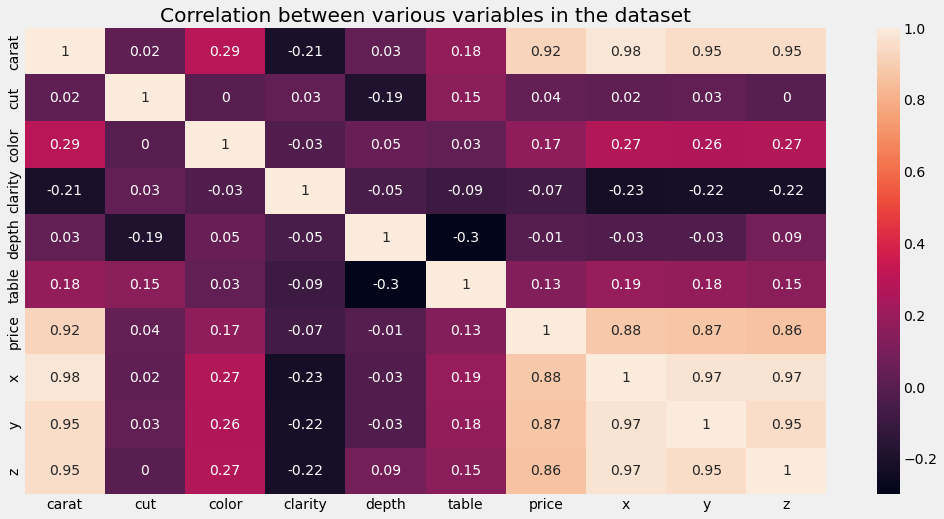

In [7]:
plt.figure(figsize=[16,8])
sns.heatmap(df.corr().round(2),annot=True)
plt.title('Correlation between various variables in the dataset')

<a id = 'nsplit'></a>
#### Normalizing the data

In [8]:
# splitting data as input features and target labels and scaling the input features
ydata = df['price']
col = list(df.columns)
col.remove('price')
xdata = df[col]
from sklearn.preprocessing import StandardScaler
norm = StandardScaler(with_mean = True,with_std = True)
norm.fit(xdata)
xdata = norm.transform(xdata)

<a id = 'split'></a>
#### Splitting the data into training and test sets

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xdata,ydata,test_size=.1)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(48414, 9) (48414,)
(5380, 9) (5380,)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

<a id = 'linear'></a>
### Linear Regression model

In [11]:
# importing the linear regression model
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

para = {} # since simple linear model has no hyperparameters to tune we pass an empty dict

lmcv = GridSearchCV(lm,para,cv=9)  
lmcv.fit(xtrain,ytrain)   

print('the best training r2_score         = ',lmcv.score(xtrain,ytrain))
print('the best cross validation r2_score = ',lmcv.score(xtest,ytest))

yhat = lmcv.predict(xtest)   # predicting the prices of rest of the houses
print('r2 score  on the test set          = ',lmcv.score(xtest,ytest))     

print(' training rmse = ',mse(lmcv.predict(xtrain),ytrain)**.5) 
print(' test rmse     = ',mse(lmcv.predict(xtest),ytest)**.5)

the best training r2_score         =  0.8845565124009566
the best cross validation r2_score =  0.8911838077967411
r2 score  on the test set          =  0.8911838077967411
 training rmse =  1354.8840352227153
 test rmse     =  1316.7589010418008


<a id = 'ridge'></a>
### Ridge Regreesion model

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge()

para = {'alpha':np.logspace(-3,1,10)} # since simple linear model has no hyperparameters to tune we pass an empty dict

ridgecv = GridSearchCV(ridge,para,cv=9) # train 8 folds and cross validate 9th fold
ridgecv.fit(xtrain,ytrain)              # training and cross validation

print('the hyper parameters are tuned to \n',ridgecv.best_params_)
print('the best training r2_score         = ',ridgecv.score(xtrain,ytrain))
print('the best cross validation r2_score = ',ridgecv.score(xtest,ytest))

yhat = ridgecv.predict(xtest)   # predicting the prices of rest of the houses
print('r2 score  on the test set          = ',ridgecv.score(xtest,ytest))   

print(' training rmse = ',mse(ridgecv.predict(xtrain),ytrain)**.5) 
print(' test rmse     = ',mse(ridgecv.predict(xtest),ytest)**.5) 

the hyper parameters are tuned to 
 {'alpha': 10.0}
the best training r2_score         =  0.8845539547844006
the best cross validation r2_score =  0.8911320358524121
r2 score  on the test set          =  0.8911320358524121
 training rmse =  1354.8990436684883
 test rmse     =  1317.0721037947446


<a id = 'knn'></a>
### Knn Regressor

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

para = {'n_neighbors':[10,20,30,40,50]}
knncv = GridSearchCV(knn,para,cv=9) # train on 8 folds and cross validate on 9th fold
knncv.fit(xtrain,ytrain)           # train and cross validate
print('the hyper parameters are tuned to \n',knncv.best_params_)
print('the best training r2_score         = ',knncv.score(xtrain,ytrain))
print('the best cross validation r2_score = ',knncv.score(xtest,ytest))

yhat = knncv.predict(xtest)   # predicting the prices of rest of the houses
print('r2 score  on the test set          = ',knncv.score(xtest,ytest)) 

print(' training rmse = ',mse(knncv.predict(xtrain),ytrain)**.5) 
print(' test rmse     = ',mse(knncv.predict(xtest),ytest)**.5)

the hyper parameters are tuned to 
 {'n_neighbors': 10}
the best training r2_score         =  0.9656570953518038
the best cross validation r2_score =  0.9599354771586198
r2 score  on the test set          =  0.9599354771586198
 training rmse =  738.985502140536
 test rmse     =  798.9865855672152


<a id = 'dtree'></a>
### Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
para = {'splitter':['best', 'random'],
        'max_depth' :[2*n for n in range(5,10)]}

dtreecv = GridSearchCV(dtree,para,cv=9)
dtreecv.fit(xtrain,ytrain)
print('the hyper parameters are tuned to \n',dtreecv.best_params_)
print('the best training r2_score         = ',dtreecv.score(xtrain,ytrain))
print('the best cross validation r2_score = ',dtreecv.score(xtest,ytest))

yhat = dtreecv.predict(xtest)   # predicting the prices of rest of the houses
print('r2 score  on the test set          = ',dtreecv.score(xtest,ytest)) 

print(' training rmse = ',mse(dtreecv.predict(xtrain),ytrain)**.5) 
print(' test rmse     = ',mse(dtreecv.predict(xtest),ytest)**.5)

the hyper parameters are tuned to 
 {'max_depth': 12, 'splitter': 'best'}
the best training r2_score         =  0.98750746343389
the best cross validation r2_score =  0.9761375327191009
r2 score  on the test set          =  0.9761375327191009
 training rmse =  445.700089047658
 test rmse     =  616.6193845576918


<a id = 'rforest'></a>
### Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor()
para = {
        'n_estimators':list(range(2,6)),
        'max_depth' :[2*n for n in range(4,8)],}

rforestcv = GridSearchCV(rforest,para,cv=9)
rforestcv.fit(xtrain,ytrain)
print('the hyper parameters are tuned to \n',rforestcv.best_params_)
print('the best training r2_score         = ',rforestcv.score(xtrain,ytrain))
print('the best cross validation r2_score = ',rforestcv.score(xtest,ytest))

yhat = dtreecv.predict(xtest)   # predicting the prices of rest of the houses
print('r2 score  on the test set          = ',rforestcv.score(xtest,ytest)) 

print(' training rmse = ',mse(rforestcv.predict(xtrain),ytrain)**.5) 
print(' test rmse     = ',mse(rforestcv.predict(xtest),ytest)**.5)

the hyper parameters are tuned to 
 {'max_depth': 14, 'n_estimators': 5}
the best training r2_score         =  0.990857762314538
the best cross validation r2_score =  0.9779812249239381
r2 score  on the test set          =  0.9779812249239381
 training rmse =  381.27967979531593
 test rmse     =  592.3195648926337


<a id = 'ann'></a>
### Artifical Neural Network as Regressor

In [16]:
ann = tf.keras.Sequential([
    tf.keras.Input(shape=[9]),
    tf.keras.layers.Dense(units=5,activation='relu'),
    tf.keras.layers.Dense(units=5,activation='relu'),
    tf.keras.layers.Dropout(.15),
    tf.keras.layers.Dense(units=5,activation='relu'),
    tf.keras.layers.Dense(units=1)
])

opt = tf.keras.optimizers.Adam()
los = tf.keras.losses.MeanSquaredError()
met = tfa.metrics.r_square.RSquare()
ann.compile(metrics = met,optimizer = opt,loss = los)

history = ann.fit(xtrain,ytrain,epochs=20,validation_split=1/9)

yhat = ann.predict(xtest)
print(' r2 score on traiing data          = ', history.history['r_square'][-1])
print(' r2 score on cross validation data = ', history.history['val_r_square'][-1])
print(' r2 score on test data             = ', r2_score(ytest,yhat))

print(' training rmse = ',mse(ann.predict(xtrain),ytrain)**.5) 
print(' test rmse     = ',mse(ann.predict(xtest),ytest)**.5)

Epoch 1/20
1345/1345 [==============================] - 4s 2ms/step - loss: 20872632.0000 - r_square: -0.3086 - val_loss: 3462299.2500 - val_r_square: 0.7768
Epoch 2/20
1345/1345 [==============================] - 2s 2ms/step - loss: 3729789.0000 - r_square: 0.7662 - val_loss: 1852008.8750 - val_r_square: 0.8806
Epoch 3/20
1345/1345 [==============================] - 2s 2ms/step - loss: 3194267.0000 - r_square: 0.7997 - val_loss: 1612757.3750 - val_r_square: 0.8960
Epoch 4/20
1345/1345 [==============================] - 3s 2ms/step - loss: 2956621.2500 - r_square: 0.8146 - val_loss: 1520255.0000 - val_r_square: 0.9020
Epoch 5/20
1345/1345 [==============================] - 2s 2ms/step - loss: 3020615.5000 - r_square: 0.8106 - val_loss: 1567089.7500 - val_r_square: 0.8990
Epoch 6/20
1345/1345 [==============================] - 2s 2ms/step - loss: 3036728.2500 - r_square: 0.8096 - val_loss: 1470636.7500 - val_r_square: 0.9052
Epoch 7/20
1345/1345 [==============================] - 3s 2ms

<a id = 'conclusions'></a>
### Comparing the performance of various models

   |Model Name        | Train R2 score | Validation R2 score| Test R2 score| Train rmse | Test rmse|
   |  :-:             |      :-:       |         :-:        |      :-:     |    :-:     |   :-:    |
   |Linear Regression      |.88|.89|.89|1354|1316|
   |Ridge Regression       |.88|.89|.89|1354|1317|
   |Knn Regressor          |.96|.95|.95|738|798|
   |Dtree Regressor        |.98|.97|.97|445|616|
   |Rforest Regressor      |.99|.97|.97|381|592|
   |Ann Regressor          |.82|.91|.91|1224|1158|

### Report
- The Random forest regressor yeilded the best performance for this problem
- The Caret,x,y,z : heavily influenced the price of a diamond

------------------------------------------------------------------------------------[BACK TO TOP](#top)